In [1]:
from IPython.display import Markdown, display
display(Markdown("header-project.md"))

header-project.md

## **[GROUP WORK] Projet step 01: descriptive stats and data cleaning**

In order to prepare the data science project that will need to complete, gather in project group and answer the following questions:

The project will use the `california_houses.csv`.
In this dataset, **each row of the dataset represents one district in California**.


 - Load the dataset
 - Identify and fix issues in the dataset (spoiler alert: there are many!)
 - For **each** column, print out descriptive statistics (including distributions, etc.) that you find relevant to get to know the data
 - Create a categorical  variable \<Closest_city> indicating the closest CA city and drop the distance to each city (not needed)
 - Describe **each** column with a descriptive sentence
 - Save your clean dataset as a csv file
 - Using a library such as `geopandas` or `plotly`, plot the location of districts on a map
 - Using the function you wrote in the first two sessions, perform a descriptive analysis of each variable independently.

In [2]:
#Importing all libraries
import pandas as pd
%pylab inline
import seaborn as sns
import geopandas
import folium
from folium.plugins import HeatMap

Populating the interactive namespace from numpy and matplotlib


# 1 - Load the dataset

In [3]:
#Loading the dataset in memory
data = pd.read_csv("california_houses_mod.csv")

#Displaying all columns of the dataset
pd.set_option('display.max_columns', None)
data.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Tot_No_Bedrooms,Max_Age
count,20654.000000,20654.000000,20607.000000,20607.000000,20607.000000,20654.000000,20654.000000,20654.000000,20654.000000,20654.000000,2.065400e+04,2.065400e+04,20654.000000,20654.000000,20654.000000,20654.000000
mean,206859.008521,74.185471,28.638230,2635.554472,537.748338,1425.302411,499.375666,35.631504,-119.569465,40499.168256,2.693968e+05,3.981210e+05,349205.216365,386711.388384,2097.530551,43.153239
std,115391.970967,5925.379749,12.591488,2180.774851,421.068876,1132.221567,382.344011,2.135876,2.003603,49130.495010,2.477182e+05,2.893975e+05,217173.597449,250143.860258,1796.213255,12.947424
min,14999.000000,-55.091700,1.000000,2.000000,1.000000,3.000000,-98.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313,0.000000,9.000000
25%,119600.000000,2.562500,18.000000,1447.500000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594146e+05,113072.904889,117332.993656,1126.000000,33.000000
50%,179700.000000,3.534700,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20521.624925,1.736264e+05,2.146241e+05,459800.789707,526561.271568,1681.000000,43.000000
75%,264700.000000,4.743700,37.000000,3147.500000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49824.747685,5.271382e+05,7.057935e+05,516946.490963,584562.195811,2509.000000,52.000000
max,500001.000000,584062.237200,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298,33110.000000,76.000000


In [4]:
#Checking the features in the dataset and their associated type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20654 entries, 0 to 20653
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20654 non-null  float64
 1   Median_Income             20654 non-null  float64
 2   Median_Age                20607 non-null  float64
 3   Tot_Rooms                 20607 non-null  float64
 4   Tot_Bedrooms              20607 non-null  float64
 5   Population                20654 non-null  float64
 6   Households                20654 non-null  float64
 7   Latitude                  20654 non-null  float64
 8   Longitude                 20654 non-null  float64
 9   Distance_to_coast         20654 non-null  float64
 10  Distance_to_LA            20654 non-null  float64
 11  Distance_to_SanDiego      20654 non-null  float64
 12  Distance_to_SanJose       20654 non-null  float64
 13  Distance_to_SanFrancisco  20654 non-null  float64
 14  Tot_No

In [5]:
data.head(10)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Tot_No_Bedrooms,Max_Age
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,751.0,50.0
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,5993.0,34.0
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,1277.0,66.0
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,1039.0,63.0
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,1347.0,68.0
5,269700.0,4.0368,52.0,919.0,213.0,413.0,193.0,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,706.0,69.0
6,299200.0,3.6591,52.0,2535.0,489.0,1094.0,514.0,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972,2046.0,65.0
7,241400.0,3.1200,52.0,3104.0,687.0,1157.0,647.0,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972,2417.0,67.0
8,226700.0,2.0804,42.0,2555.0,665.0,1206.0,595.0,37.84,-122.26,6363.948013,554949.749519,733820.824419,64751.463863,16744.406584,1890.0,56.0
9,261100.0,3.6912,52.0,3549.0,707.0,1551.0,714.0,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972,2842.0,69.0


# 2 - Dataset edit

In [6]:
def calculate_iqr_bounds(column):
    """
    Function : Calculate IQR-based lower and upper bounds for a given column.
    Input : column = Feature from a Pandas Dataframe
    Output : lower_bound = float | upper_bound = float
    """
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return lower_bound, upper_bound

datac = data.copy()
mask = pd.DataFrame(False, index=datac.index, columns=datac.columns)

# Median Income
lb, ub = calculate_iqr_bounds(datac['Median_Income'])
mask['Median_Income'] |= (datac['Median_Income'] <= 0) | (datac['Median_Income'] >= ub)

# Tot_Rooms
lb, ub = calculate_iqr_bounds(datac['Tot_Rooms'])
mask['Tot_Rooms'] |= (datac['Tot_Rooms'] <= lb) | (datac['Tot_Rooms'] >= ub)

# Tot_Bedrooms
lb, ub = calculate_iqr_bounds(datac['Tot_Bedrooms'])
mask['Tot_Bedrooms'] |= (datac['Tot_Bedrooms'] <= lb) | (datac['Tot_Bedrooms'] >= ub)

# Population
lb, ub = calculate_iqr_bounds(datac['Population'])
mask['Population'] |= (datac['Population'] <= lb)

# Households
lb, ub = calculate_iqr_bounds(datac['Households'])
mask['Households'] |= (datac['Households'] <= 0) | (datac['Households'] <= lb) | (datac['Households'] >= ub)

# Tot_No_Bedrooms
lb, ub = calculate_iqr_bounds(datac['Tot_No_Bedrooms'])
mask['Tot_No_Bedrooms'] |= (datac['Tot_No_Bedrooms'] == 0) | (datac['Tot_No_Bedrooms'] >= ub)

# Max_Age
lb, ub = calculate_iqr_bounds(datac['Max_Age'])
mask['Max_Age'] |= (datac['Max_Age'] <= lb)

# Filter the data
datac = datac[~mask.any(axis=1)]

# Describe the filtered data
datac.describe()


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Tot_No_Bedrooms,Max_Age
count,18347.000000,18347.000000,18302.000000,18302.000000,18302.000000,18347.000000,18347.000000,18347.000000,18347.000000,18347.000000,1.834700e+04,1.834700e+04,18347.000000,18347.000000,18347.000000,18347.000000
mean,196002.282389,3.617192,29.691728,2158.543766,449.969621,1217.292963,421.043495,35.667691,-119.595063,41281.461376,2.731744e+05,4.026788e+05,347655.717122,384553.116684,1708.455006,44.202376
std,106501.306363,1.477746,12.254801,1087.566116,225.671462,661.492891,209.745950,2.155891,2.001100,50256.897014,2.495079e+05,2.910160e+05,216202.412151,249246.415992,893.717772,12.626872
min,14999.000000,0.499900,1.000000,12.000000,3.000000,3.000000,2.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313,6.000000,9.000000
25%,114800.000000,2.507200,19.250000,1386.000000,288.000000,764.000000,272.000000,33.940000,-121.790000,9079.170083,3.149612e+04,1.600565e+05,114742.702481,119339.829491,1072.000000,34.000000
50%,173200.000000,3.421900,30.000000,1997.000000,414.000000,1109.000000,389.000000,34.270000,-118.530000,20549.168213,1.788681e+05,2.271172e+05,457130.729641,521909.665394,1570.000000,45.000000
75%,250000.000000,4.539450,38.000000,2808.000000,584.000000,1565.000000,545.000000,37.730000,-118.030000,50854.892163,5.300707e+05,7.086278e+05,515191.249776,582867.006775,2224.000000,53.000000
max,500001.000000,8.014400,52.000000,5684.000000,1173.000000,8733.000000,1092.000000,41.950000,-114.490000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298,4578.000000,76.000000


# 3 - Print out descriptive statistics

🔵 Feature : Median_House_Value

Central tendency measurement :
 * Mean:  196002.28238949148
 * Median:  173200.0

Dispersion measurement :
 * Variance:  11341910034.60559
 * Standard deviation:  106498.40390637594

Shape measurement :
 * Skewness:  1.0118345105340083
 * Kurtosis:  0.6369405533530856

P1 and P99 :
 * P1:  49546.0
 * P5:  64700.0
 * P25:  114800.0
 * P50:  173200.0
 * P75:  250000.0
 * P95:  420940.0000000001
 * P99:  500001.0

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
       Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
89               500001.0         1.2434        52.0      249.0          78.0   
140              483300.0         6.3624        30.0      292.0          38.0   
459              500001.0         1.1696        52.0      609.0         236.0   
489              489600.0         3.0417        48.0     2153.0         517.0   
491              456300.0         5.0463        52.0     1709.0         318.0   
...  

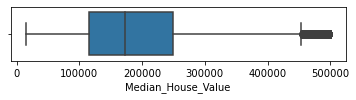

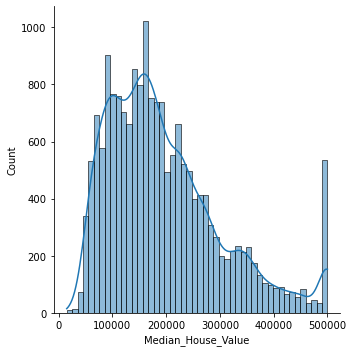

------------------------------





🔵 Feature : Median_Income

Central tendency measurement :
 * Mean:  3.6171920422957644
 * Median:  3.4219

Dispersion measurement :
 * Variance:  2.1836131038326734
 * Standard deviation:  1.477705350816824

Shape measurement :
 * Skewness:  0.5857065529127522
 * Kurtosis:  -0.10356462031008995

P1 and P99 :
 * P1:  1.0525600000000002
 * P5:  1.5618
 * P25:  2.5072
 * P50:  3.4219
 * P75:  4.53945
 * P95:  6.409410000000001
 * P99:  7.581786000000001

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
       Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
362              329800.0         7.6923        28.0      794.0         111.0   
403              357300.0         7.8864        52.0     1927.0         279.0   
404              374400.0         7.9556        52.0     2079.0         273.0   
417              371300.0         7.8336        37.0     2220.0         335.0   
493              500001.0         7.8521 

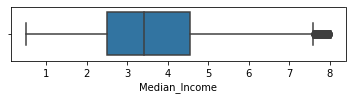

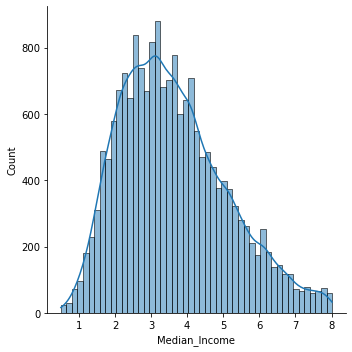

------------------------------





🔵 Feature : Median_Age

Central tendency measurement :
 * Mean:  29.69172768003497
 * Median:  30.0

Dispersion measurement :
 * Variance:  150.17193353572264
 * Standard deviation:  12.25446586089017

Shape measurement :
 * Skewness:  0.009532348979313402
 * Kurtosis:  -0.7831621784244476

P1 and P99 :
 * P1:  5.0
 * P5:  10.0
 * P25:  19.25
 * P50:  30.0
 * P75:  38.0
 * P95:  52.0
 * P99:  52.0

Outlier test :
✅ No outliers detected.


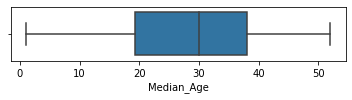

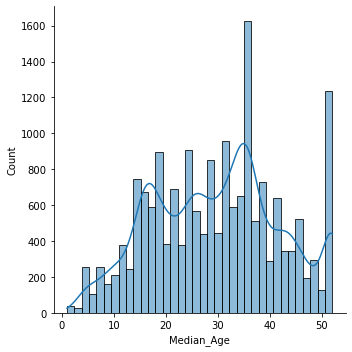

------------------------------





🔵 Feature : Tot_Rooms

Central tendency measurement :
 * Mean:  2158.543765708666
 * Median:  1997.0

Dispersion measurement :
 * Variance:  1182735.4302504507
 * Standard deviation:  1087.5364041035366

Shape measurement :
 * Skewness:  0.6149093350680146
 * Kurtosis:  0.0806923289056849

P1 and P99 :
 * P1:  156.0
 * P5:  588.0500000000001
 * P25:  1386.0
 * P50:  1997.0
 * P75:  2808.0
 * P95:  4236.0
 * P99:  5109.960000000006

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
       Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
125              337300.0         5.4570        28.0     5287.0        1048.0   
128              411500.0         7.5544        40.0     4991.0         674.0   
133              333300.0         6.8976        34.0     5065.0         788.0   
758              179300.0         3.8750        21.0     5031.0        1168.0   
839              234400.0         5.8704        17.0     5159

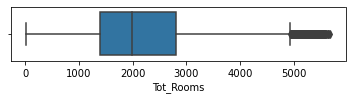

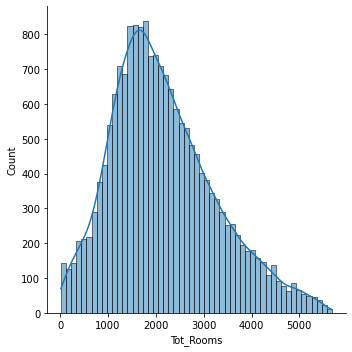

------------------------------





🔵 Feature : Tot_Bedrooms

Central tendency measurement :
 * Mean:  449.96962080646927
 * Median:  414.0

Dispersion measurement :
 * Variance:  50924.8263091008
 * Standard deviation:  225.6652970864169

Shape measurement :
 * Skewness:  0.6529881247924846
 * Kurtosis:  0.12145017896162003

P1 and P99 :
 * P1:  36.00999999999999
 * P5:  132.0
 * P25:  288.0
 * P50:  414.0
 * P75:  584.0
 * P95:  884.0
 * P99:  1068.0

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
       Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
99               193100.0         2.6104        37.0     3633.0        1085.0   
111              218500.0         2.6429        32.0     3809.0        1098.0   
117              234100.0         3.0897        52.0     4190.0        1105.0   
125              337300.0         5.4570        28.0     5287.0        1048.0   
164              225000.0         2.9345        42.0     4120.0        1065

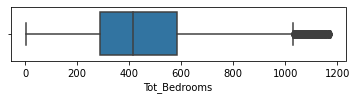

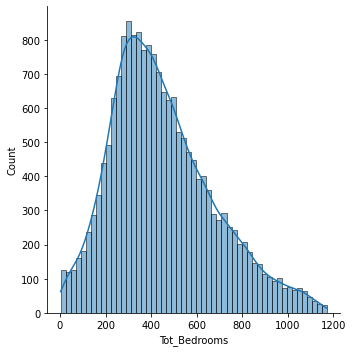

------------------------------





🔵 Feature : Population

Central tendency measurement :
 * Mean:  1217.2929634272632
 * Median:  1109.0

Dispersion measurement :
 * Variance:  437548.9952756076
 * Standard deviation:  661.4748636763211

Shape measurement :
 * Skewness:  1.2364579949677714
 * Kurtosis:  3.847709146222904

P1 and P99 :
 * P1:  87.0
 * P5:  335.0
 * P25:  764.0
 * P50:  1109.0
 * P75:  1565.0
 * P95:  2435.7000000000007
 * P99:  3246.2400000000052

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
       Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
204              118100.0         1.6009        44.0     2340.0         825.0   
460              175000.0         1.4012        52.0     1087.0         371.0   
536              275000.0         2.5444        30.0     4145.0         869.0   
839              234400.0         5.8704        17.0     5159.0         832.0   
874              220200.0         4.8962        31.0     4981.0

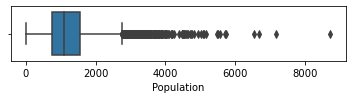

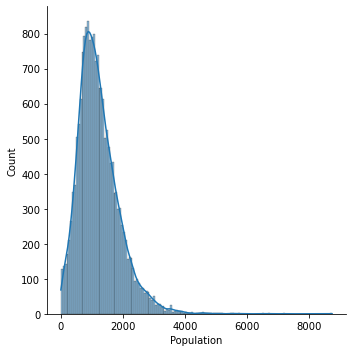

------------------------------





🔵 Feature : Households

Central tendency measurement :
 * Mean:  421.0434948492942
 * Median:  389.0

Dispersion measurement :
 * Variance:  43990.965677828404
 * Standard deviation:  209.74023380798545

Shape measurement :
 * Skewness:  0.6138887944784193
 * Kurtosis:  0.09806988176767284

P1 and P99 :
 * P1:  31.0
 * P5:  121.0
 * P25:  272.0
 * P50:  389.0
 * P75:  545.0
 * P95:  823.0
 * P99:  989.0

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
       Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
99               193100.0         2.6104        37.0     3633.0        1085.0   
111              218500.0         2.6429        32.0     3809.0        1098.0   
117              234100.0         3.0897        52.0     4190.0        1105.0   
125              337300.0         5.4570        28.0     5287.0        1048.0   
164              225000.0         2.9345        42.0     4120.0        1065.0   
...     

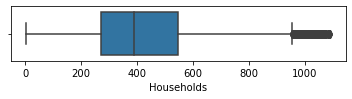

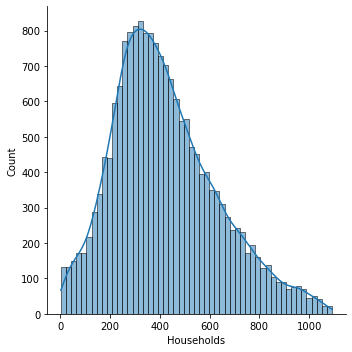

------------------------------





🔵 Feature : Latitude

Central tendency measurement :
 * Mean:  35.66769117566898
 * Median:  34.27

Dispersion measurement :
 * Variance:  4.647611086183157
 * Standard deviation:  2.15583187799586

Shape measurement :
 * Skewness:  0.4486083271234755
 * Kurtosis:  -1.1181097990422273

P1 and P99 :
 * P1:  32.68
 * P5:  32.81
 * P25:  33.94
 * P50:  34.27
 * P75:  37.73
 * P95:  39.08
 * P99:  40.700800000000015

Outlier test :
✅ No outliers detected.


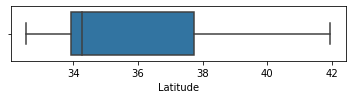

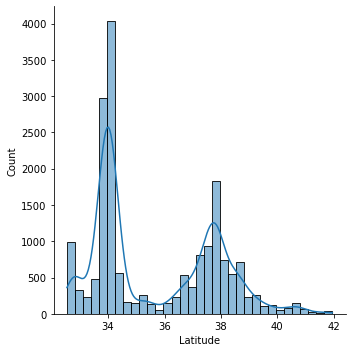

------------------------------





🔵 Feature : Longitude

Central tendency measurement :
 * Mean:  -119.59506295306869
 * Median:  -118.53

Dispersion measurement :
 * Variance:  4.004183397955406
 * Standard deviation:  2.001045576181464

Shape measurement :
 * Skewness:  -0.28525285389873045
 * Kurtosis:  -1.3164722650305687

P1 and P99 :
 * P1:  -123.36000000000001
 * P5:  -122.47
 * P25:  -121.79
 * P50:  -118.53
 * P75:  -118.03
 * P95:  -117.08
 * P99:  -116.25

Outlier test :
✅ No outliers detected.


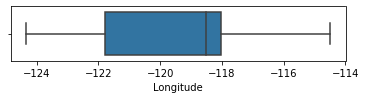

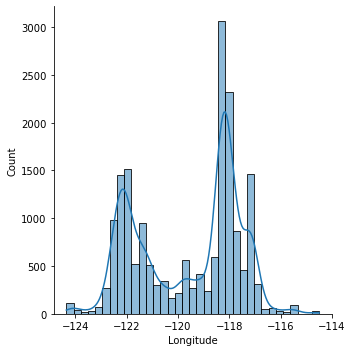

------------------------------





🔵 Feature : Distance_to_coast

Central tendency measurement :
 * Mean:  41281.46137584717
 * Median:  20549.1682129517

Dispersion measurement :
 * Variance:  2525618031.6410365
 * Standard deviation:  50255.52737402162
🚨 Warning Standard deviation 121.73873137985606 times bigger than mean

Shape measurement :
 * Skewness:  1.901280290628252
 * Kurtosis:  3.1105871590118257

P1 and P99 :
 * P1:  1497.7966356301802
 * P5:  3126.2770119492498
 * P25:  9079.17008276078
 * P50:  20549.1682129517
 * P75:  50854.892163492244
 * P95:  169239.46484309278
 * P99:  193453.95246208337

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
       Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
1022             117600.0         2.4500        17.0     1364.0         282.0   
1023              97900.0         2.2417        15.0     2061.0         465.0   
1024             140600.0         3.1500        16.0     3045.0         543.0

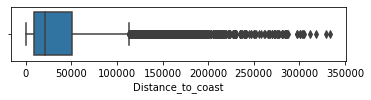

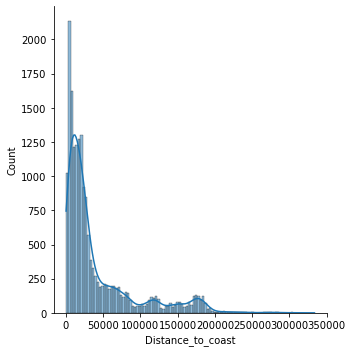

------------------------------





🔵 Feature : Distance_to_LA

Central tendency measurement :
 * Mean:  273174.4226154757
 * Median:  178868.136873177

Dispersion measurement :
 * Variance:  62250789353.652016
 * Standard deviation:  249501.08086670088

Shape measurement :
 * Skewness:  0.45387929109855146
 * Kurtosis:  -1.2088421909920326

P1 and P99 :
 * P1:  4479.018087953739
 * P5:  9656.79569100359
 * P25:  31496.121967542298
 * P50:  178868.136873177
 * P75:  530070.718795303
 * P95:  638930.663949305
 * P99:  856888.2999756185

Outlier test :
✅ No outliers detected.


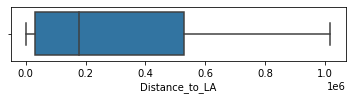

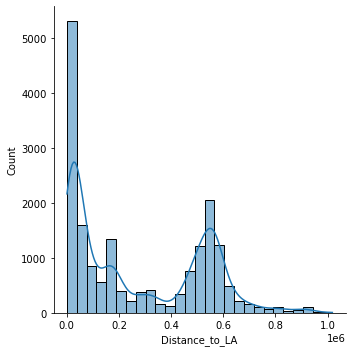

------------------------------





🔵 Feature : Distance_to_SanDiego

Central tendency measurement :
 * Mean:  402678.82055612194
 * Median:  227117.180314515

Dispersion measurement :
 * Variance:  84685678682.01288
 * Standard deviation:  291008.0388614941

Shape measurement :
 * Skewness:  0.368219738873411
 * Kurtosis:  -1.366694304231868

P1 and P99 :
 * P1:  6111.49659185151
 * P5:  19700.379095780365
 * P25:  160056.458942016
 * P50:  227117.180314515
 * P75:  708627.782718531
 * P95:  817341.3506281789
 * P99:  1034198.8969502513

Outlier test :
✅ No outliers detected.


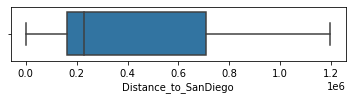

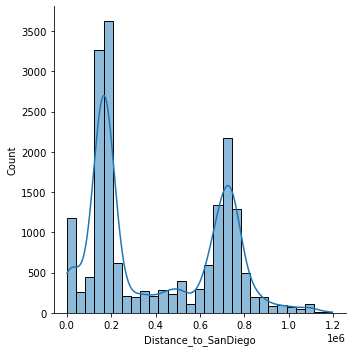

------------------------------





🔵 Feature : Distance_to_SanJose

Central tendency measurement :
 * Mean:  347655.71712212724
 * Median:  457130.72964051896

Dispersion measurement :
 * Variance:  46740935274.67756
 * Standard deviation:  216196.52003368962

Shape measurement :
 * Skewness:  -0.1966903674064189
 * Kurtosis:  -1.4335159586122967

P1 and P99 :
 * P1:  5942.168321988261
 * P5:  29084.91939185061
 * P25:  114742.702480554
 * P50:  457130.72964051896
 * P75:  515191.2497761855
 * P95:  666767.699873241
 * P99:  687714.5461530788

Outlier test :
✅ No outliers detected.


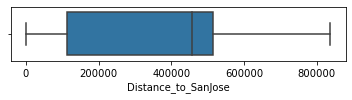

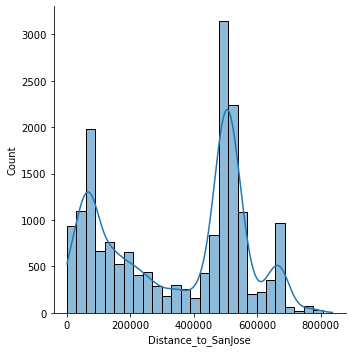

------------------------------





🔵 Feature : Distance_to_SanFrancisco

Central tendency measurement :
 * Mean:  384553.11668364616
 * Median:  521909.66539444396

Dispersion measurement :
 * Variance:  62120389839.322044
 * Standard deviation:  249239.62333329354

Shape measurement :
 * Skewness:  -0.2388001108451786
 * Kurtosis:  -1.5004099079471018

P1 and P99 :
 * P1:  2993.52502154157
 * P5:  17780.059477454
 * P25:  119339.829490537
 * P50:  521909.66539444396
 * P75:  582867.0067746695
 * P95:  734742.3486151991
 * P99:  755641.0860728209

Outlier test :
✅ No outliers detected.


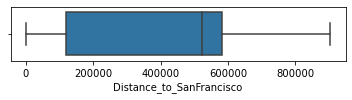

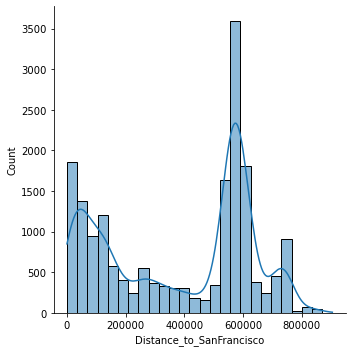

------------------------------





🔵 Feature : Tot_No_Bedrooms

Central tendency measurement :
 * Mean:  1708.4550062680548
 * Median:  1570.0

Dispersion measurement :
 * Variance:  798687.9209466202
 * Standard deviation:  893.693415521576

Shape measurement :
 * Skewness:  0.6832477879264993
 * Kurtosis:  0.2061803407023528

P1 and P99 :
 * P1:  111.46000000000001
 * P5:  437.0
 * P25:  1072.0
 * P50:  1570.0
 * P75:  2224.0
 * P95:  3437.7000000000007
 * P99:  4218.0

Outlier test :
🚨 Warning Outliers detected:
 * High outliers:
       Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
125              337300.0         5.4570        28.0     5287.0        1048.0   
128              411500.0         7.5544        40.0     4991.0         674.0   
133              333300.0         6.8976        34.0     5065.0         788.0   
839              234400.0         5.8704        17.0     5159.0         832.0   
874              220200.0         4.8962        31.0   

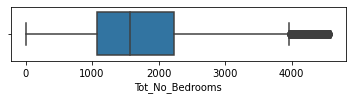

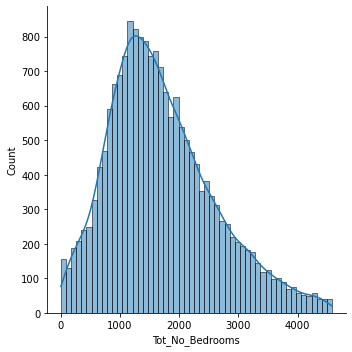

------------------------------





🔵 Feature : Max_Age

Central tendency measurement :
 * Mean:  44.20237641031231
 * Median:  45.0

Dispersion measurement :
 * Variance:  159.42920239758465
 * Standard deviation:  12.626527725292677

Shape measurement :
 * Skewness:  0.0025697967816235455
 * Kurtosis:  -0.6874861268762449

P1 and P99 :
 * P1:  18.0
 * P5:  24.0
 * P25:  34.0
 * P50:  45.0
 * P75:  53.0
 * P95:  65.0
 * P99:  70.0

Outlier test :
✅ No outliers detected.


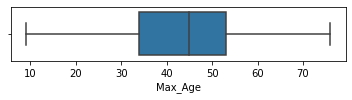

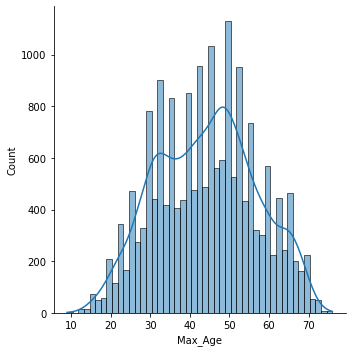

------------------------------





Finished! :D


In [7]:
numerical_features = datac.select_dtypes(include=np.number).columns

for c in numerical_features:
    print(f"🔵 Feature : {c}\n")
    
    # Central tendency measurement
    print("Central tendency measurement :")
    print(" * Mean: ", datac[c].mean())
    print(" * Median: ", datac[c].median())
    
    # Dispersion measurement
    print("\nDispersion measurement :")
    print(" * Variance: ", datac[c].var(ddof=0))
    print(" * Standard deviation: ", datac[c].std(ddof=0))
    
    if (datac[c].mean() * datac[c].std(ddof=0)) >= 0 and datac[c].std(ddof=0) >= datac[c].mean():
        print(f"🚨 Warning Standard deviation {datac[c].std(ddof=0) / datac[c].mean() * 100} times bigger than mean")
    
    # Shape measurement
    print("\nShape measurement :")
    print(" * Skewness: ", datac[c].skew())
    print(" * Kurtosis: ", datac[c].kurtosis())
    
    # P1 and P99
    Q1 = datac[c].quantile(0.25)
    Q3 = datac[c].quantile(0.75)
    print("\nP1 and P99 :")
    print(" * P1: ", datac[c].quantile(0.01))
    print(" * P5: ", datac[c].quantile(0.05))
    print(" * P25: ", Q1)
    print(" * P50: ", datac[c].quantile(0.50))
    print(" * P75: ", Q3)
    print(" * P95: ", datac[c].quantile(0.95))
    print(" * P99: ", datac[c].quantile(0.99))
    
    # Outlier test
    print("\nOutlier test :")
    IQR = Q3 - Q1
    
    high_outliers = datac[(datac[c] > Q3 + 1.5 * IQR)]
    low_outliers = datac[(datac[c] < Q1 - 1.5 * IQR)]
    
    if not high_outliers.empty or not low_outliers.empty:
        print("🚨 Warning Outliers detected:")
        if not high_outliers.empty:
            print(" * High outliers:")
            print(high_outliers)
        print()
        if not low_outliers.empty:
            print(" * Low outliers:")
            print(low_outliers)
    else:
        print("✅ No outliers detected.")
    
    # Box plot and distribution plot
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=c, data=datac)
    plt.xlabel(c)
    plt.show()
    sns.displot(x=c, data=datac, kde=True)
    plt.show()
    
    print("------------------------------\n\n\n\n\n")

print("Finished! :D")

# 4 - Add 'Closest_city' feature

In [8]:
datac['Distance_to_LA'] = datac['Distance_to_LA'].apply(float)
datac['Distance_to_SanDiego'] = datac['Distance_to_SanDiego'].apply(float)


def closest_city(row):
    distances = {
        'LA': row['Distance_to_LA'],
        'SanDiego': row['Distance_to_SanDiego'],
        'SanFrancisco': row['Distance_to_SanFrancisco'],
        'SanJose': row['Distance_to_SanJose']
    }
    return min(distances, key=distances.get)

datac['Closest_city'] = datac.apply(closest_city, axis=1)
datac.drop(columns=['Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanFrancisco', 'Distance_to_SanJose'], inplace=True)

In [9]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18347 entries, 2 to 20653
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median_House_Value  18347 non-null  float64
 1   Median_Income       18347 non-null  float64
 2   Median_Age          18302 non-null  float64
 3   Tot_Rooms           18302 non-null  float64
 4   Tot_Bedrooms        18302 non-null  float64
 5   Population          18347 non-null  float64
 6   Households          18347 non-null  float64
 7   Latitude            18347 non-null  float64
 8   Longitude           18347 non-null  float64
 9   Distance_to_coast   18347 non-null  float64
 10  Tot_No_Bedrooms     18347 non-null  float64
 11  Max_Age             18347 non-null  float64
 12  Closest_city        18347 non-null  object 
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


# 5 - Describe each sentences with a sentence

Please refer to PDF report

# 6 - Save the clean dataset as a .csv file

In [10]:
datac.to_csv('california_houses_clean.csv', sep=',', index=True, header=True)

# 7 - Plot the location districts of the map

In [11]:
map_hooray = folium.Map(location=[36.7783,-119.4179],
                    zoom_start = 6, min_zoom=5) 

df = datac[['Latitude', 'Longitude']]
data_heat = [[row['Latitude'],row['Longitude']] for index, row in df.iterrows()]
HeatMap(data_heat, radius=10).add_to(map_hooray)
map_hooray


# 8 - Descriptive Analysis

Please refer to PDF report